# Distribuciones Discretas

Muchos eventos y fenómenos del mundo natural pueden medirse utilizando escalas y supuestos similares. Esto permite especificar la distribución correspondiente como una ecuación que resume el comportamiento de la función sin tener que especificar el peso de probabilidad de cada entrada por separado.

En este apunte presentamos algunas de estas distribuciones.

### Distribución Bernoulli

_Modela el resultado en un evento binario._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
X\in\{0,1\}\\
&\mathrm{Variable \textbf{ discreta } que\ representa\newline 
    las\ dos\ posibilidades\ en\ un\newline 
    evento\ binario.}\\\\
\mathrm{\textbf{Parámetros}}\\
\theta\in(0,1)\\
&\mathrm{Probabilidad\ del\ caso\ \textit{éxito}.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(X)=\theta^{x}(1-\theta)^{1-x}\\\\
&P(X)=\begin{cases}
        P(X=0)&=\theta^0(1-\theta)^{1-0}\\
              &=(1-\theta)\\\\
        P(X=1)&=\theta^1(1-\theta)^{1-1}\\
              &=\theta\\
    \end{cases}\\
\mathrm{\textbf{Notación Compacta}}\\
&X\sim Bernoulli(\theta)\\
&\textrm{Esta expresión es una forma compacta}\\
&\textrm{de resumir el dominio de la variable,}\\
&\textrm{los parámetros de la distribución,}\\
&\textrm{y su función de masa específica.}
\end{align}$$

Por ejemplo, si utilizamos la distribución Bernoulli para modelar un volado con una moneda justa:

$$\begin{align}
X&\sim Bernoulli(\theta=0.5)\\\\
P(X)&=\begin{cases}
        P(X=0)&=(1-\theta)\\
              &=0.5\\\\
        P(X=1)&=\theta^1(1-\theta)^0\\
              &=0.5\\
    \end{cases}
\end{align}$$

O para modelar el evento "obtener 4 con un dado justo":

$$\begin{align}
X&\sim Bernoulli\left(\theta=\frac{1}{6}\right)\\\\
P(X)&=\begin{cases}
        P(X=0)&=(1-\theta)\\
              &=\frac{5}{6}\\\\
        P(X=1)&=\theta^1(1-\theta)^0\\
              &=\frac{1}{6}\\
    \end{cases}
\end{align}$$

En otras palabras, esta distribución es la manera _formal_ de decir que, en un evento binario, si se conoce la probabilidad de éxito en automático se conoce la probabilidad de fracaso. Esta idea está expresada en la ecuación específica de la función de masa de probabilidad, que, de la misma manera que en el resto de las distribuciones siguientes, especifica **los valores de probabilidad como función de los _valores numéricos_** de la variable.



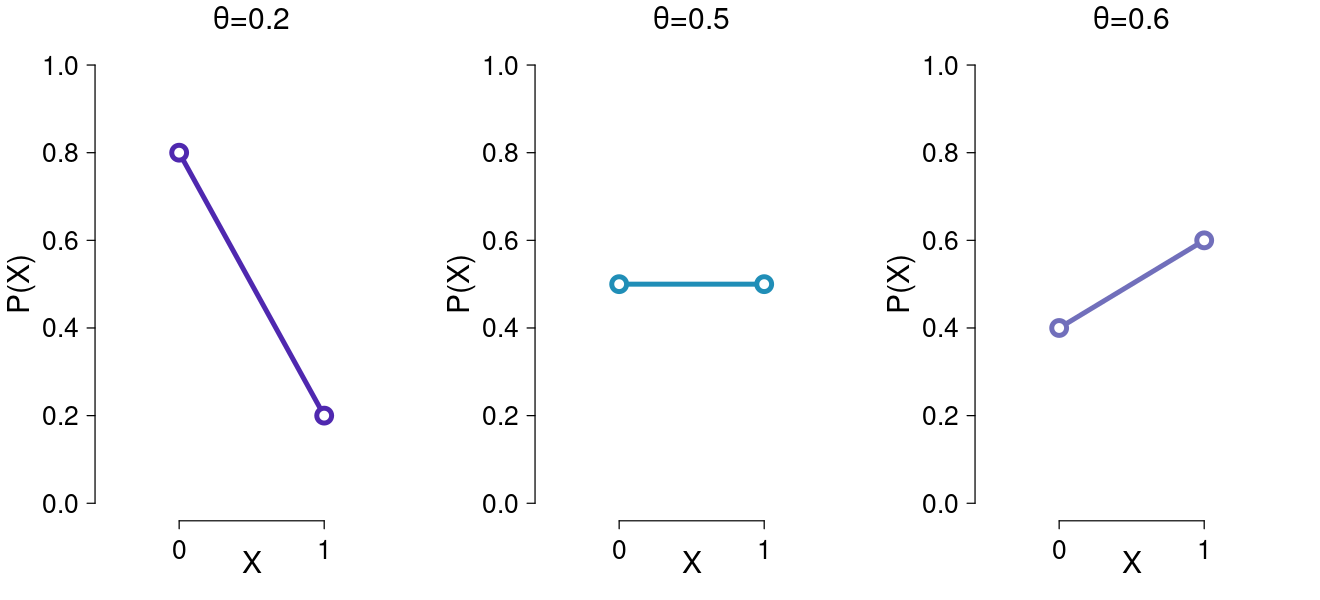

In [1]:
# Examples Bernoulli Distribution
# Density Definition
bernoulli <- function(prob){
    x <- c(0,1)
    pmf <- prob^x*(1-prob)^(1-x)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 11, repr.plot.height = 5)
par(mar=c(5,6,3,2),cex.axis=2)
layout(matrix(1:3,ncol=3))
# 3 coin flips
theta <- c(0.2,0.5,0.6)
colors <- c('#4f28af','#208eb7','#716fbb')
for(th in 1:length(theta)){
    plot(NULL,xlim=c(-0.5,1.5),ylim=c(0,1),ann=F,axes=F)
    axis(1,at=0:1,padj=.5);axis(2,las=1)
    distribution <- bernoulli(theta[th])
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2.5,col=colors[th])
    mtext('X',1,line=2.5,cex=1.5)
    mtext('P(X)',2,line=4,cex=1.5)
    mtext(paste('\u03b8=',theta[th],sep=''),3,line=1,cex=1.5)
}


#### Extendiendo la Distribución Bernoulli (Pt. 1)

Aparte de utilizar la Bernoulli para modelar un solo evento binario, podemos extenderla para modelar el resultado de varios. Imaginen que vamos a tirar **dos volados** con una moneda justa y nos interesa especificar la incertidumbre sobre el **número de éxitos** que obtendremos. En este caso, la variable aleatoria $K$ tiene tres posibilidades:

$$K\in\{0,1,2\}$$

Para calcular qué tan probable es cada uno de ellos conviene imaginar las posibilidades **conjuntas** entre el primer $X_1$ y segundo $X_2$ volados, e identificar el valor de $K$ correspondiente a cada entrada de esa conjunta:

|$\mathbf{K}$|$X_{1}=0$|$X_{1}=1$|
|:-:|:-:|:-:|
|$X_{2}=0$|$\mathbf{0}$|$\mathbf{1}$|
|$X_{2}=1$|$\mathbf{1}$|$\mathbf{2}$|

En otras palabras, para encontrar la distribución sobre $K$ basta con encontrar la conjunta entre $X_1$ y $X_2$. Sabemos que podemos expresar dicha conjunta como:

$$P(X_1,X_2)=P(X_2|X_1)P(X_1)$$

Modelaremos $X_1$ como una variable Bernoulli común y corriente, llamando $\gamma$ a la probabilidad de éxito en esa variable:

$$X_1\sim Bernoulli(\gamma),$$

es decir:

$$P(X_1)=\begin{cases}
P(X_1=0)=(1-\gamma)\\
P(X_1=1)=\gamma
\end{cases}$$

A continuación necesitamos la condicional $P(X_2|X_1)$. Para especificarla conviene recordar qué representa: esta distribución es la incertidumbre sobre el resultado en el segundo volado después de observar el primero. _¿Qué esperarían sobre el segundo volado si **a.** en el primero observan SOL, o si **b.** observan ÁGUILA, o si **c.** no tienen información sobre lo que pasó en el primer volado? ¿Hay razones para modificar la incertidumbre en alguno de esos escenarios?_ En otras palabras, como las expectativas sobre $X_2$ son (argüiblemente) las mismas en los tres escenarios, podemos suponer que $X_1$ y $X_2$ son **independientes**:

$$X_1\bot X_2,$$

lo cual quiere decir:

$$P(X_2|X_1)=P(X_2),$$

que permite calcular la conjunta entre los dos volados como:

$$\begin{align}P(X_1,X_2)&=P(X_2|X_1)P(X_1)\\
    &=P(X_2)P(X_1)
\end{align}$$

Finalmente, para especificar la marginal sobre $X_2$, que es otra variable Bernoulli, vamos a suponer que la probabilidad de éxito en el segundo volado es **idéntica** a la probabilidad de éxito en el primero (que referimos como $\gamma$):

$$X_2\sim Bernoulli(\gamma)$$

En otras palabras, _suponiendo_ **independencia** _y_ **distribución idéntica** entre los dos ensayos Bernoulli, la distribución conjunta entre ellos es igual a:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=(1-\gamma)(1-\gamma)\\
    P(X_1=0,X_2=1)=(1-\gamma)\gamma\\
    P(X_1=1,X_2=0)=\gamma(1-\gamma)\\
    P(X_1=1,X_2=1)=\gamma\gamma\\
\end{cases}$$

Noten que cada una de estas combinaciones tiene un valor de $K$ asociado (la variable que cuenta cantidad de éxitos). Presentando esta relación de forma explícita, junto con algunos exponentes implícitos en la expresión anterior:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=\gamma^{\mathbf{0}}(1-\gamma)^{\mathbf{2}}:K=\mathbf{0}\\
    P(X_1=0,X_2=1)=\gamma^{\mathbf{1}}(1-\gamma)^{\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=0)=\gamma^{\mathbf{1}}(1-\gamma)^{\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=1)=\gamma^{\mathbf{2}}(1-\gamma)^{\mathbf{0}}:K=\mathbf{2}\\
\end{cases}$$

Incluir los exponentes de manera explícita permite comenzar a descubrir la relación entre ellos y los posibles valores de $K$. Además, podemos presentar dicha relación todavía más clara añadiendo $n=2$, que es el número de volados bajo estudio:

$$P(X_1,X_2)=\begin{cases}
    P(X_1=0,X_2=0)=\gamma^{\mathbf{0}}(1-\gamma)^{2-\mathbf{0}}:K=\mathbf{0}\\
    P(X_1=0,X_2=1)=\gamma^{\mathbf{1}}(1-\gamma)^{2-\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=0)=\gamma^{\mathbf{1}}(1-\gamma)^{2-\mathbf{1}}:K=\mathbf{1}\\
    P(X_1=1,X_2=1)=\gamma^{\mathbf{2}}(1-\gamma)^{2-\mathbf{2}}:K=\mathbf{2}\\
\end{cases}$$

Es decir, al modelar el número de éxito esperado en dos volados:

$$
P(K)=\begin{cases}
    P(K=\mathbf{0})=P(X_1=0,X_2=0)&=(1)\gamma^{\mathbf{0}}(1-\gamma)^{n-\mathbf{0}}\\
    P(K=\mathbf{1})=P(X_1=0,X_2=1\cup X_1=1,X_2=0)&=(2)\gamma^{\mathbf{1}}(1-\gamma)^{n-\mathbf{1}}\\
    P(K=\mathbf{2})=P(X_1=1,X_2=1)&=(1)\gamma^{\mathbf{2}}(1-\gamma)^{n-\mathbf{2}}\\
\end{cases}
$$

En la expresión anterior, los coeficientes por los que hay que multiplicar la expresión $\gamma^k(1-\gamma)^{n-k}$ para cada entrada de $K$ también pueden expresarse como función de los valores numéricos de $K$. Dicha función se conoce como **coeficiente binomial** y está definida como:

$${n\choose k} =\frac{n!}{k!(n-k)!},$$

que, intuitivamente, representa el número de maneras posibles de observar $k$ éxitos en $n$ ensayos. Examinando su comportamiento para cada valor de $K$:

$$
{n \choose K}=\begin{cases}
    {n=2\choose k=0}=\frac{2!}{0!(2-0)!}=\frac{(2)(1)}{1(2)!}=1\\
    {n=2\choose k=1}=\frac{2!}{1!(2-1)!}=\frac{(2)(1)}{1(1)!}=2\\
    {n=2\choose k=2}=\frac{2!}{2!(2-2)!}=\frac{(2)(1)}{2!(0)!}=1\\
\end{cases}
$$

Combinando el coeficiente binomial, que devuelve el número de entradas en la conjunta $P(X_1,X_2)$ que corresponden a cada valor de $K$, y la expresión $\gamma^{k}(1-\gamma)^{n-k}$, que especifica qué tan probable es cada una de esas entradas, podemos calcular toda la distribución sobre $K$ como función de sus **valores numéricos**:

$$
P(K)=\begin{cases}
    P(K=\mathbf{0})&={n\choose \mathbf{0}}\gamma^{\mathbf{0}}(1-\gamma)^{n-\mathbf{0}}\\
    P(K=\mathbf{1})&={n\choose \mathbf{1}}\gamma^{\mathbf{1}}(1-\gamma)^{n-\mathbf{1}}\\
    P(K=\mathbf{2})&={n\choose \mathbf{2}}\gamma^{\mathbf{2}}(1-\gamma)^{n-\mathbf{2}}\\
\end{cases}
$$

Es decir,

$$P(K=k)={n\choose k}\gamma^k(1-\gamma)^{n-k}$$

Resumiendo,

### Distribución Binomial

_Modela el número de éxitos en una serie de ensayos Bernoulli **independientes** e **idénticamente** distribuidos (iid)._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
K\in\{0,1,...,n\}\\
&\textrm{Variable discreta que representa}\\ 
&\textrm{los posibles números de éxitos}\\ 
&\textrm{en $n$ ensayos Bernoulli iid.}\\\\ 
\mathrm{\textbf{Parámetros}}\\
\gamma\in(0,1)\\
&\mathrm{Probabilidad\ (constante)\ de\ éxito.}\\ 
&\mathrm{en\ cada\ ensayo.}\\
n\in\{0,1,...,\infty \}\\
&\mathrm{Número\ de\ ensayos\ bajo\ estudio.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(K=k)={n\choose k}\gamma^k(1-\gamma)^{n-k}\\\\
\mathrm{\textbf{Notación Compacta}}\\
&K\sim Binomial(\gamma,n)
\end{align}$$

El modelo Binomial puede trabajar con más de dos ensayos Bernoulli, desde luego adaptando el límite superior de la variable aleatoria pero respetando el resto de ecuaciones. Por ejemplo, llamando $Z$ a una variable que cuenta en número de éxitos en 3 volados con probabilidad de éxito $\omega$ en cada uno:

$$\begin{align}Z&\sim Binomial(\omega,n)\\
Z&\in\{0,1,2,3\}
\end{align}$$

Esta vez la conjunta tiene tres dimensiones de dos valores cada una, para un total de 8 entradas. Suponiendo **independencia** entre volados podemos expresar dicha conjunta como el producto de las marginales, y suponiendo **distribución idéntica** entre volados el peso de cada entrada en la conjunta está dado por:

$$P(X_1,X_2,X_3)=\begin{cases}
P(X_1=0,X_2=0,X_3=0)=\omega^0(1-\omega)^{3-0}:Z=0\\
P(X_1=1,X_2=0,X_3=0)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=0,X_2=1,X_3=0)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=0,X_2=0,X_3=1)=\omega^1(1-\omega)^{3-1}:Z=1\\
P(X_1=1,X_2=1,X_3=0)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=1,X_2=0,X_3=1)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=0,X_2=1,X_3=1)=\omega^2(1-\omega)^{3-2}:Z=2\\
P(X_1=1,X_2=1,X_3=1)=\omega^3(1-\omega)^{3-3}:Z=3
\end{cases}$$

Lo que permite expresar la incertidumbre sobre $Z$ como:

$$P(Z)=\begin{cases}
P(Z=0)=(1)\omega^0(1-\omega)^{n-0}\\
P(Z=1)=(3)\omega^1(1-\omega)^{n-1}\\
P(Z=2)=(3)\omega^2(1-\omega)^{n-2}\\
P(Z=3)=(1)\omega^3(1-\omega)^{n-3}
\end{cases}$$

Comprobando que el coeficiente binomial devuelve los coeficientes adecuados como función de $Z$:

$$
{n \choose Z}=\begin{cases}
    {n=3\choose z=0}=\frac{3!}{0!(3-0)!}=\frac{(3)(2)(1)}{1(3)!}=\frac{(3)(2)(1)}{(3)(2)(1)}=1\\
    {n=3\choose z=1}=\frac{3!}{1!(3-1)!}=\frac{(3)(2)(1)}{1(2)!}=\frac{(3)(2)(1)}{(2)(1)}=3\\
    {n=3\choose z=2}=\frac{3!}{2!(3-2)!}=\frac{(3)(2)(1)}{2(1)!}=\frac{(3)(2)(1)}{(2)(1)}=3\\
    {n=3\choose z=3}=\frac{3!}{3!(3-3)!}=\frac{(3)(2)(1)}{6(0)!}=\frac{(3)(2)(1)}{(6)(1)}=1\\
\end{cases}
$$

Lo cual demuestra que para modelar el número de éxitos en $n=3$ volados (o cualquier otro número entero) también podemos utilizar la misma expresión:

$$P(Z)={n\choose z}\omega^{z}(1-\omega)^{n-z}$$

Resolviendo el ejemplo concreto $\omega=0.2$, que puede representar una moneda "sesgada":

$$P(Z)=\begin{cases}
P(Z=0)=(1)(0.2)^0(1-0.2)^{3-0}=(1)(1.000)(0.512)=(1)(0.512)=0.512\\
P(Z=1)=(3)(0.2)^1(1-0.2)^{3-1}=(3)(0.200)(0.640)=(3)(0.128)=0.384\\
P(Z=2)=(3)(0.2)^2(1-0.2)^{3-2}=(3)(0.040)(0.800)=(3)(0.032)=0.096\\
P(Z=3)=(1)(0.2)^3(1-0.2)^{3-3}=(1)(0.008)(1.000)=(1)(0.008)=0.008
\end{cases}$$

Distribución que agota la incertidumbre sobre todos los escenarios posibles de $Z$ y por lo tanto cumple:

$$\sum_{z}P(Z=z)=1$$

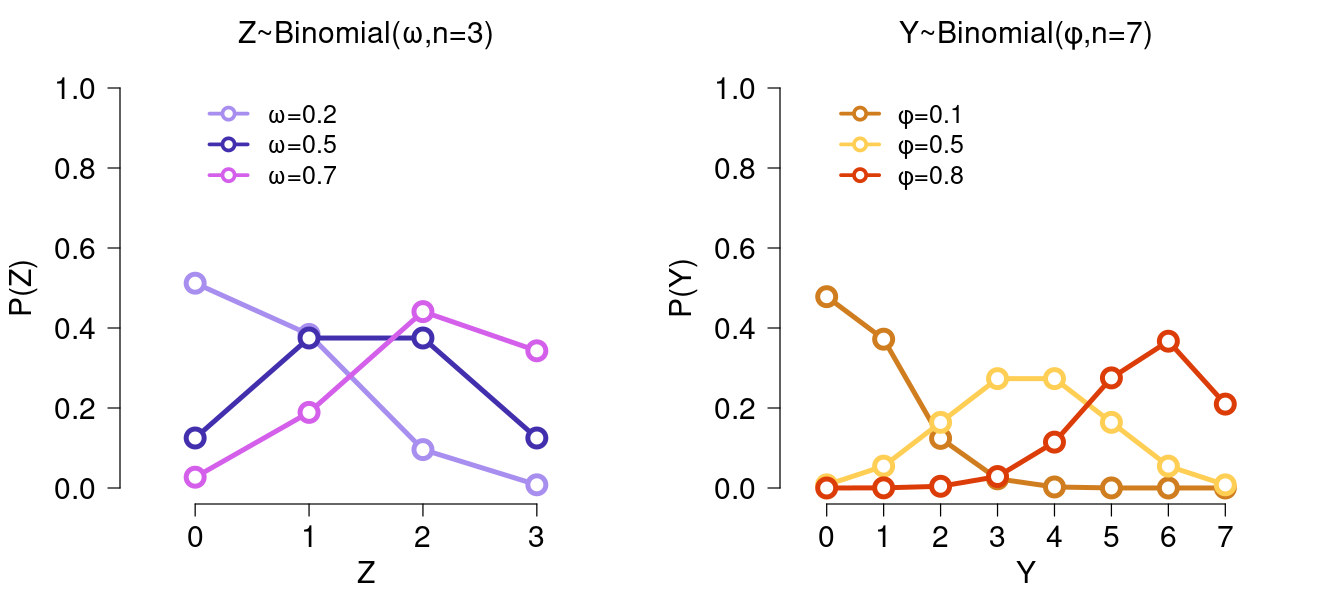

In [2]:
# Examples Binomial Distribution
# Density Definition
binom <- function(prob,n){
    x <- 0:n
    pmf <- (factorial(n)/(factorial(x)*factorial(n-x)))*(prob^x)*(1-prob)^(n-x)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 11, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.5)
layout(matrix(1:2,ncol=2))
# 3 coin flips
n <- 3
omega <- c(0.2,0.5,0.7)
colors <- c('#a88fef','#422fae','#d45fea')
plot(NULL,xlim=c(-.5,n+.5),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:n);axis(2,las=1)
for(om in 1:length(omega)){
    distribution <- binom(omega[om],n)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[om])
}
legend(0,1,xjust=0,yjust=1,
      legend=paste('\u03c9=',omega,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.8,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Z',1,line=2.5,cex=1.5)
mtext('P(Z)',2,line=3.5,cex=1.5)
mtext('Z~Binomial(\u03c9,n=3)',3,line=1,cex=1.5)
# 7 coin flips
n <- 7
kappa <- c(0.1,0.5,0.8)
colors <- c('#cf7d1e','#ffce54','#dc3c07')
plot(NULL,xlim=c(-.5,n+.5),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:n);axis(2,las=1)
for(kp in 1:length(kappa)){
    distribution <- binom(kappa[kp],n)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[kp])
}
legend(0,1,xjust=0,yjust=1,
      legend=paste('\u03c6=',kappa,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.8,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Y',1,line=2.5,cex=1.5)
mtext('P(Y)',2,line=3.5,cex=1.5)
mtext('Y~Binomial(\u03c6,n=7)',3,line=1,cex=1.5)

### Ejercicios

1. Considera un aplicante que, como parte de una entrevista de trabajo, tiene que responder un examen inesperado sobre un tema del que nunca había escuchado (y en un idioma que no conoce). La prueba tiene 12 preguntas de opción múltiple, cada una con cuatro distractores y una opción correcta. ¿**Cuántos aciertos** esperas que consiga si responde todas las preguntas al azar? (Especifica la probabilidad de _cada_ posible número de aciertos.)  

2. ¿Qué tan probable es que el aplicante apruebe el examen, es decir, que tenga 7 éxitos o más?

### Soluciones

1. Como el participante responde todas las preguntas al azar, no tenemos razones para modificar la incertidumbre sobre el siguiente reactivo incluso si observáramos el resultado del anterior, lo que permite suponer **independencia** entre reactivos; además, todos los reactivos tienen la misma cantidad de distractores y de alternativas correctas, lo que sugiere probabilidad **idéntica** de responder correctamente cada uno. Estos dos supuestos justifican modelar la incertidumbre sobre el número de correctas utilizando la distribución Binomial:

$$X\sim Binomial(\theta=0.2,n=12)$$

$$P(X)=\begin{cases}
P(X=0)={12\choose 0}(0.2)^{0}(0.8)^{12-0}\approx(1)(1)(0.0687)\approx0.06872\\
P(X=1)={12\choose 1}(0.2)^{1}(0.8)^{12-1}\approx(12)(0.2)(0.0859)\approx0.20616\\
P(X=2)={12\choose 2}(0.2)^{2}(0.8)^{12-2}\approx(66)(0.04)(0.1073)\approx0.28347\\
P(X=3)={12\choose 3}(0.2)^{3}(0.8)^{12-3}\approx(220)(0.008)(0.1342)\approx0.23622\\
P(X=4)={12\choose 4}(0.2)^{4}(0.8)^{12-4}\approx(495)(0.0016)(0.1678)\approx0.13287\\
P(X=5)={12\choose 5}(0.2)^{5}(0.8)^{12-5}\approx(792)(0.00032)(0.2097)\approx0.05316\\
P(X=6)={12\choose 6}(0.2)^{6}(0.8)^{12-6}\approx(924)(6.4\textrm{x}10^{-05})(0.2621)\approx0.01550\\
P(X=7)={12\choose 7}(0.2)^{7}(0.8)^{12-7}\approx(792)(1.28\textrm{x}10^{-05})(0.3276)\approx0.00322\\
P(X=8)={12\choose 8}(0.2)^{8}(0.8)^{12-8}\approx(495)(2.56\textrm{x}10^{-06})(0.4096)\approx0.00052\\
P(X=9)={12\choose 9}(0.2)^{9}(0.8)^{12-9}\approx(220)(5.12\textrm{x}10^{-07})(0.512)\approx0.00006\\
P(X=10)={12\choose 10}(0.2)^{10}(0.8)^{12-10}\approx(66)(1.024\textrm{x}10^{-07})(0.64)\approx0.000004\\
P(X=11)={12\choose 11}(0.2)^{11}(0.8)^{12-11}\approx(12)(2.048\textrm{x}10^{-08})(0.8)\approx0.0000001\\
P(X=12)={12\choose 12}(0.2)^{12}(0.8)^{12-12}\approx(1)(4.096\textrm{x}10^{-09})(1)\approx0.000000004\\
\end{cases}$$

2. La probabilidad de que el participante apruebe se calcula como:

$$\begin{align}P(X\geq7)&=P(X=7\cup X=8\cup X=9\cup X=10\cup X=11\cup X=12)\\
                        &=P(X=7)+P(X=8)+\dots+P(X=12)\\
                        &\approx0.00322+0.00052+0.00006+0.000004+0.0000001+0.000000004\\
                        &\approx0.0039\\
\end{align}$$

Es decir, esperamos que por cada mil intentos apruebe aproximadamente cuatro. 

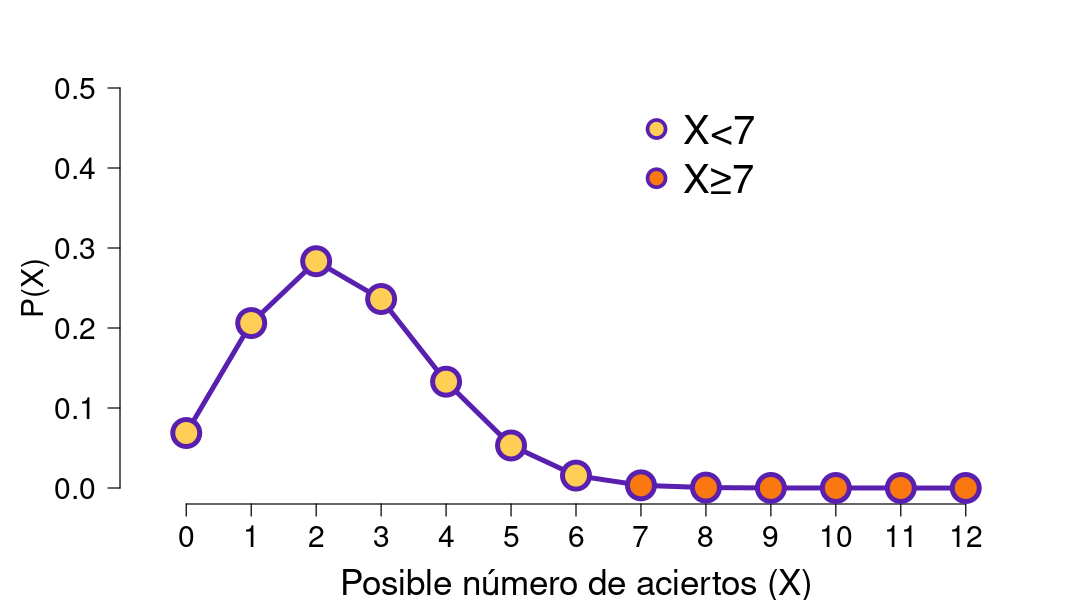

In [3]:
options(repr.plot.width = 9, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.5)
dist <- binom(prob = 0.2,n = 12)
plot(NULL,xlim=c(-.5,max(dist$x)+.5),ylim=c(0,.5),ann=F,axes=F)
axis(1,at=0:max(dist$x));axis(2,las=1)
bg_cols <- rep('#ffce54',length(dist$x))
bg_cols[dist$x>=7] <- '#fb7810'
points(dist$x,dist$pmf,cex=3,lwd=4,col='#5920af',bg=bg_cols,type='o',pch=21)
mtext('Posible número de aciertos (X)',1,cex=1.75,line=3)
mtext('P(X)',2,cex=1.5,line=3)
legend(7,.5,legend=c('X<7','X\u22657'),pch=21,pt.bg=c('#ffce54','#fb7810'),
      lwd=3,pt.cex=2,cex=2,seg.len=0,x.intersp=.5,y.intersp=1.5,col='#5920af',
      box.lty='blank')

#### Extendiendo la Distribución Bernoulli (Pt. 2)

La distribución Binomial puede interpretarse como la respuesta a la pregunta _¿cuántos éxitos esperamos en `n` número de ensayos Bernoulli?_ Es posible, sin embargo, que nos interesen responder otras preguntas sobre la serie de ensayos binarios iid. Por ejemplo, en algunos escenarios aplicados podría ser relevante preguntar _¿**cuántos fracasos** observaremos **antes** del primer éxito?_

Para responder esta nueva pregunta comenzamos definiendo la variable aleatoria correspondiente. Nuevamente se trata de una variable con números enteros, pero esta vez la variable corre desde $0$ y hasta $\infty$:

$$Y\in\{0, 1, 2, \dots,\infty\}$$

porque es posible que en la serie de ensayos observemos un éxito sin observar ningún fracaso, y también es posible, aunque quizá poco probable, que observemos un número muy elevado de fracasos antes de registrar el primer éxito; de hecho, no hay nada que impida que nunca observemos un éxito y que la serie de "volados" esté compuesta por un número infinito de fracasos. 

Para calcular los valores de probabilidad correspondientes a cada valor de esta variable conviene analizar algunos de los posibles resultados del experimento:

$$\mathrm{Posibles\newline resultados}=\begin{cases}
X_1=1 &\textrm{Éxito en el primer ensayo}\\
X_1=0,X_2=1 &\textrm{Fracaso en el primer ensayo y éxito en el segundo}\\
X_1=0,X_2=0,X_3=1 &\textrm{Fracasos en los primeros dos y éxito en el tercero}\\
X_1=0,X_2=0,X_3=0,X_4=1 &\textrm{Fracasos en los primeros tres y éxito en el cuarto}\\
\vdots\\
\end{cases}$$

Cada uno de estos *posibles* escenarios tiene asociado un valor de la variable aleatoria $Y$, variable que cuenta el número de fracasos antes del primer éxito:   

$$\mathrm{Posibles\newline resultados}=\begin{cases}
X_1=1 &Y=\mathbf{0}\\
X_1=0,X_2=1 &Y=\mathbf{1}\\
X_1=0,X_2=0,X_3=1 &Y=\mathbf{2}\\
X_1=0,X_2=0,X_3=0,X_4=1 &Y=\mathbf{3}\\
\vdots&\vdots\\
\end{cases}$$

Suponiendo **independencia** y distribución **idéntica** entre ensayos Bernoulli, donde cada ensayo $X_i\sim Bernoulli(\theta)$, podemos calcular la probabilidad de cada uno de los posibles escenarios como el producto de las marginales por ensayo:

$$P(Y)=\begin{cases}
P(X_1=1)&=P(X_1=1)&=(1-\theta)^0\theta &=P(Y=\mathbf{0})\\
P(X_1=0,X_2=1)&=P(X_1=0)P(X_2=1)&=(1-\theta)^1\theta &=P(Y=\mathbf{1})\\
P(X_1=0,X_2=0,X_3=1)&=P(X_1=0)P(X_2=0)P(X_3=1)&=(1-\theta)^2\theta &=P(Y=\mathbf{2})\\
P(X_1=0,X_2=0,X_3=0,X_4=1)&=P(X_1=0)P(X_2=0)P(X_3=0)P(X_4=1)&=(1-\theta)^3\theta &=P(Y=\mathbf{3})\\
\vdots&\vdots&\vdots&\vdots\\
\end{cases}$$

Es decir, la probabilidad de observar $Y=y$ fracasos antes del primer éxito en una serie de ensayos Bernoulli iid con probabilidad de éxito $\theta$ está dada por:

$$P(Y=y)=\theta(1-\theta)^y$$

Resumiendo,

### Distribución Geométrica

_Modela el número de fracasos antes del primer éxito en una serie de ensayos Bernoulli **independientes** e **idénticamente** distribuidos (iid)._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
Y\in\{0,1,...,\infty\}\\
&\textrm{Variable discreta que representa}\\ 
&\textrm{los posibles números de fracasos}\\ 
&\textrm{antes del primer éxito en una serie}\\
&\textrm{de ensayos Bernoulli iid.}\\\\ 
\mathrm{\textbf{Parámetros}}\\
\theta\in(0,1)\\
&\mathrm{Probabilidad\ (constante)\ de\ éxito}\\ 
&\mathrm{en\ cada\ ensayo.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(Y=y)=\theta(1-\theta)^y\\\\
\mathrm{\textbf{Notación Compacta}}\\
&Y\sim Geometric(\theta)
\end{align}$$

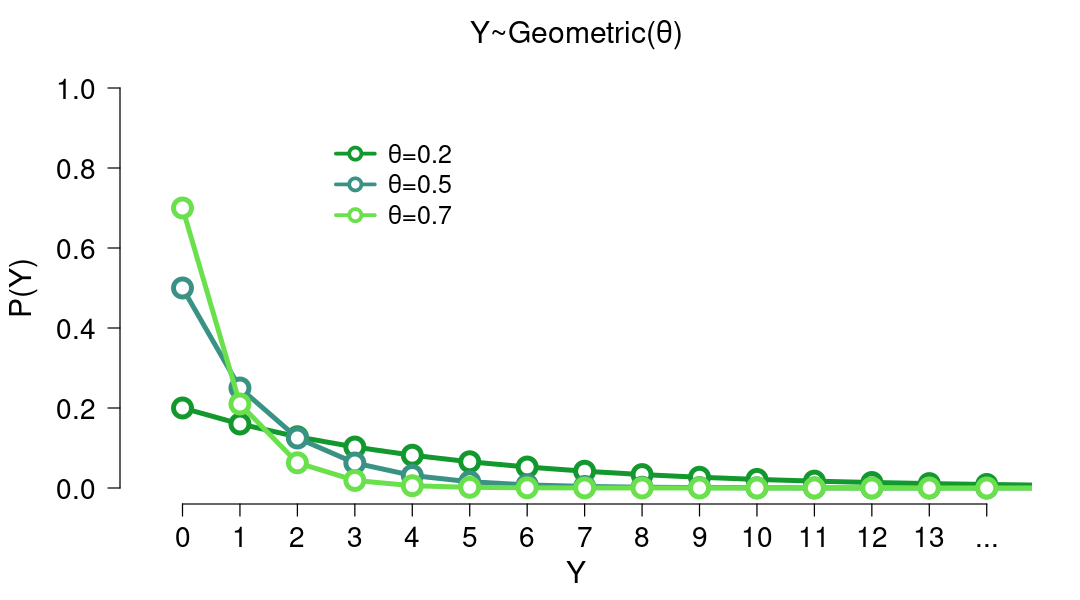

In [4]:
# Examples Geometric Distribution
# Density Definition
geometric <- function(prob){
    x <- 0:100 # Although this random variable runs up to infinity
    pmf <- prob*(1-prob)^x
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 9, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.4)
theta <- c(0.2,0.5,0.7)
colors <- c('#12982d','#399283','#69e04c')
plot(NULL,xlim=c(-.5,14+.2),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:14,labels=c(as.character(0:13),'...'));axis(2,las=1)
for(th in 1:length(theta)){
    distribution <- geometric(theta[th])
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[th])
}
legend(2.5,0.9,xjust=0,yjust=1,
      legend=paste('\u03b8=',theta,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=1.2,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Y',1,line=2.5,cex=1.5)
mtext('P(Y)',2,line=3.5,cex=1.5)
mtext('Y~Geometric(\u03b8)',3,line=1,cex=1.5)

#### Extendiendo la Distribución Geométrica

La distribución anterior sirve para modelar el número de fracasos antes de **un** éxito en la serie Bernoulli, sin embargo es posible que nos interese detener la serie de ensayos después de un número mayor de éxitos. Por ejemplo, si estamos buscando personas para trabajar en cierta actividad y tenemos **tres** vacantes, una pregunta pertinente es _¿cuántos fracasos encontraremos antes de encontrar los tres éxitos que nos interesan?_ 

La variable aleatoria de interés nuevamente corre desde $0$ hasta $\infty$, porque es posible que observemos los tres éxitos seguidos, y también es posible que nunca lleguemos a contar tres éxitos;

$$Y\in\{0,1,2,\dots,\infty\}$$

entre esos dos extremos tenemos todas las posibilidades del "experimento". Nuevamente conviene estudiar las primeras para calcular la probabilidad de cada valor de la nueva variable aleatoria:

$$\mathrm{Posibles\newline resultados}=\begin{cases}
X_1=1,X_2=1,X_3=1 &\textrm{Éxitos en los primeros tres ensayos}\\
X_1=0,X_2=1,X_3=1,X_4=1 &\textrm{Fracaso en el primero y éxitos en los tres siguientes}\\
X_1=1,X_2=0,X_3=1,X_4=1 &\vdots\\
X_1=1,X_2=1,X_3=0,X_4=1 \\
X_1=0,X_2=0,X_3=1,X_4=1,X_5=1 \\
X_1=0,X_2=1,X_3=0,X_4=1,X_5=1 \\
X_1=0,X_2=1,X_3=1,X_4=0,X_5=1 \\
X_1=1,X_2=0,X_3=0,X_4=1,X_5=1 \\
X_1=1,X_2=0,X_3=1,X_4=0,X_5=1 \\
X_1=1,X_2=1,X_3=0,X_4=0,X_5=1 \\
X_1=0,X_2=0,X_3=0,X_4=1,X_5=1,X_6=1 \\
\vdots\\
\end{cases}$$

Resultado similar al que obtuvimos construyendo la distribución Geométrica: todas las posibles "ramas" del experimento terminan cuando contamos el último éxito, y su longitud aumenta conformen aumentan los números de fracasos. Suponiendo **independencia** y distribución **idéntica** entre ensayos, cada uno $X_i\sim Bernoulli(\theta)$:

$$P=\begin{cases}
P(X_1=1,X_2=1,X_3=1) &=P(X_1=1)P(X_2=1)P(X_3=1)&=\theta^3(1-\theta)^0\\
P(X_1=0,X_2=1,X_3=1,X_4=1) &=P(X_1=0)P(X_2=1)P(X_3=1)P(X_4=1)&=\theta^3(1-\theta)^1\\
P(X_1=1,X_2=0,X_3=1,X_4=1) &=P(X_1=1)P(X_2=0)P(X_3=1)P(X_4=1)&=\theta^3(1-\theta)^1\\
P(X_1=1,X_2=1,X_3=0,X_4=1) &=P(X_1=1)P(X_2=1)P(X_3=0)P(X_4=1)&=\theta^3(1-\theta)^1\\
P(X_1=0,X_2=0,X_3=1,X_4=1,X_5=1) &=P(X_1=0)P(X_2=0)P(X_3=1)P(X_4=1)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=0,X_2=1,X_3=0,X_4=1,X_5=1) &=P(X_1=0)P(X_2=1)P(X_3=0)P(X_4=1)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=0,X_2=1,X_3=1,X_4=0,X_5=1) &=P(X_1=0)P(X_2=1)P(X_3=1)P(X_4=0)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=1,X_2=0,X_3=0,X_4=1,X_5=1) &=P(X_1=1)P(X_2=0)P(X_3=0)P(X_4=1)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=1,X_2=0,X_3=1,X_4=0,X_5=1) &=P(X_1=1)P(X_2=0)P(X_3=1)P(X_4=0)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=1,X_2=1,X_3=0,X_4=0,X_5=1) &=P(X_1=1)P(X_2=1)P(X_3=0)P(X_4=0)P(X_5=1)&=\theta^3(1-\theta)^2\\
P(X_1=0,X_2=0,X_3=0,X_4=1,X_5=1,X_6=1) &\vdots&\vdots\\
\vdots\\
\end{cases}$$

Los exponentes de $\theta$ y de $(1-\theta)$ comienzan a sugerir la relación con los valores numéricos de la variable $Y$, y con la cantidad de éxitos que estamos buscando, que llamaremos $r=3$. Sin embargo, en este experimento tenemos varias ramas que corresponden al mismo valor de la variable $Y$, similar a lo que ocurre en la distribución Binomial. Para hacer estas relaciones explícitas presentamos los valores correspondientes de $Y$ y el número de ramas que conducen a cada uno: 

$$=\begin{cases}
\left.
\begin{aligned}
P(X_1=1)P(X_2=1)P(X_3=1)&&=\theta^3(1-\theta)^\mathbf{0}\\
\end{aligned}
\right\}
&Y=\mathbf{0}; \mathbf{(1)}\text{ rama}\\
\left.
\begin{aligned}
P(X_1=0)P(X_2=1)P(X_3=1)P(X_4=1)&&=\theta^3(1-\theta)^\mathbf{1}\\
P(X_1=1)P(X_2=0)P(X_3=1)P(X_4=1)&&=\theta^3(1-\theta)^\mathbf{1}\\
P(X_1=1)P(X_2=1)P(X_3=0)P(X_4=1)&&=\theta^3(1-\theta)^\mathbf{1}\\
\end{aligned}
\right\}
&Y=\mathbf{1}; \mathbf{(3)}\text{ ramas}\\
\left.
\begin{aligned}
P(X_1=0)P(X_2=0)P(X_3=1)P(X_4=1)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
P(X_1=0)P(X_2=1)P(X_3=0)P(X_4=1)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
P(X_1=0)P(X_2=1)P(X_3=1)P(X_4=0)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
P(X_1=1)P(X_2=0)P(X_3=0)P(X_4=1)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
P(X_1=1)P(X_2=0)P(X_3=1)P(X_4=0)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
P(X_1=1)P(X_2=1)P(X_3=0)P(X_4=0)P(X_5=1)&&=\theta^3(1-\theta)^\mathbf{2}\\
\end{aligned}
\right\}
&Y=\mathbf{2}; \mathbf{(6)}\text{ ramas}\\
\begin{aligned}
P(X_1=0)P(X_2=0)P(X_3=0)P(X_4=1)P(X_5=1)P(X_6=1)
\end{aligned}\\
\vdots\\
\end{cases}$$

En otras palabras, *aparte* de la relación entre exponentes, $Y$, y $r$, necesitamos una función que devuelva el número de ramas correspondientes a cada valor $Y=y$. Dicha función nuevamente utiliza el **coeficiente binomial**, y tiene la forma: 

$${y+r-1 \choose y}$$

Intuitivamente, esta expresión en el coeficiente binomial responde _¿de cuántas maneras podemos ver $y$ fracasos en una serie de tamaño igual a ese número de fracasos **más** $r$ número de éxitos **menos** uno?__, porque sabemos que el último ensayo siempre será éxito Resolviendo para los primeros valores de $Y$, con $r=3$:

$${y+r-1 \choose y}=\begin{cases}
{\mathbf{0}+3-1 \choose \mathbf{0}}=\frac{2!}{0!(2-0)!}=\frac{(2)(1)}{(2)(1)}=\mathbf{1}\\
{\mathbf{1}+3-1 \choose \mathbf{1}}=\frac{3!}{1!(3-1)!}=\frac{(3)(2)(1)}{(2)(1)}=\mathbf{3}\\
{\mathbf{2}+3-1 \choose \mathbf{2}}=\frac{4!}{2!(4-2)!}=\frac{(4)(3)(2)(1)}{(2)(1)(2)(1)}=\mathbf{6}\\
\vdots
\end{cases}$$

Lo cual devuelve el número de ramas adecuado para cada valor de la variable $Y$. Este coeficiente binomial, multiplicado por la probabilidad de cada rama correspondiente a un valor de $Y=y$, equivale a la función de masa sobre $Y$ en este nuevo experimento:

$$P(Y=y)={y+r-1 \choose y}\theta^r(1-\theta)^y$$

Resumiendo,

### Distribución Binomial Negativa

_Modela el número de fracasos antes de cierto número de éxitos en una serie de ensayos Bernoulli **iid**._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
Y\in\{0,1,...,\infty\}\\
&\textrm{Variable discreta que representa}\\ 
&\textrm{los posibles números de fracasos}\\ 
&\textrm{antes de $r$ éxitos en una serie}\\
&\textrm{de ensayos Bernoulli iid.}\\\\ 
\mathrm{\textbf{Parámetros}}\\
\theta\in(0,1)\\
&\mathrm{Probabilidad\ (constante)\ de\ éxito}\\
&\mathrm{en\ cada\ ensayo.}\\
r\in\{0,1,...,\infty \}\\
&\mathrm{Número\ de\ éxitos\ objetivo.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(Y=y)={y+r-1\choose y}\theta^r(1-\theta)^y\\\\
\mathrm{\textbf{Notación Compacta}}\\
&Y\sim NegBinomial(\theta,r)
\end{align}$$

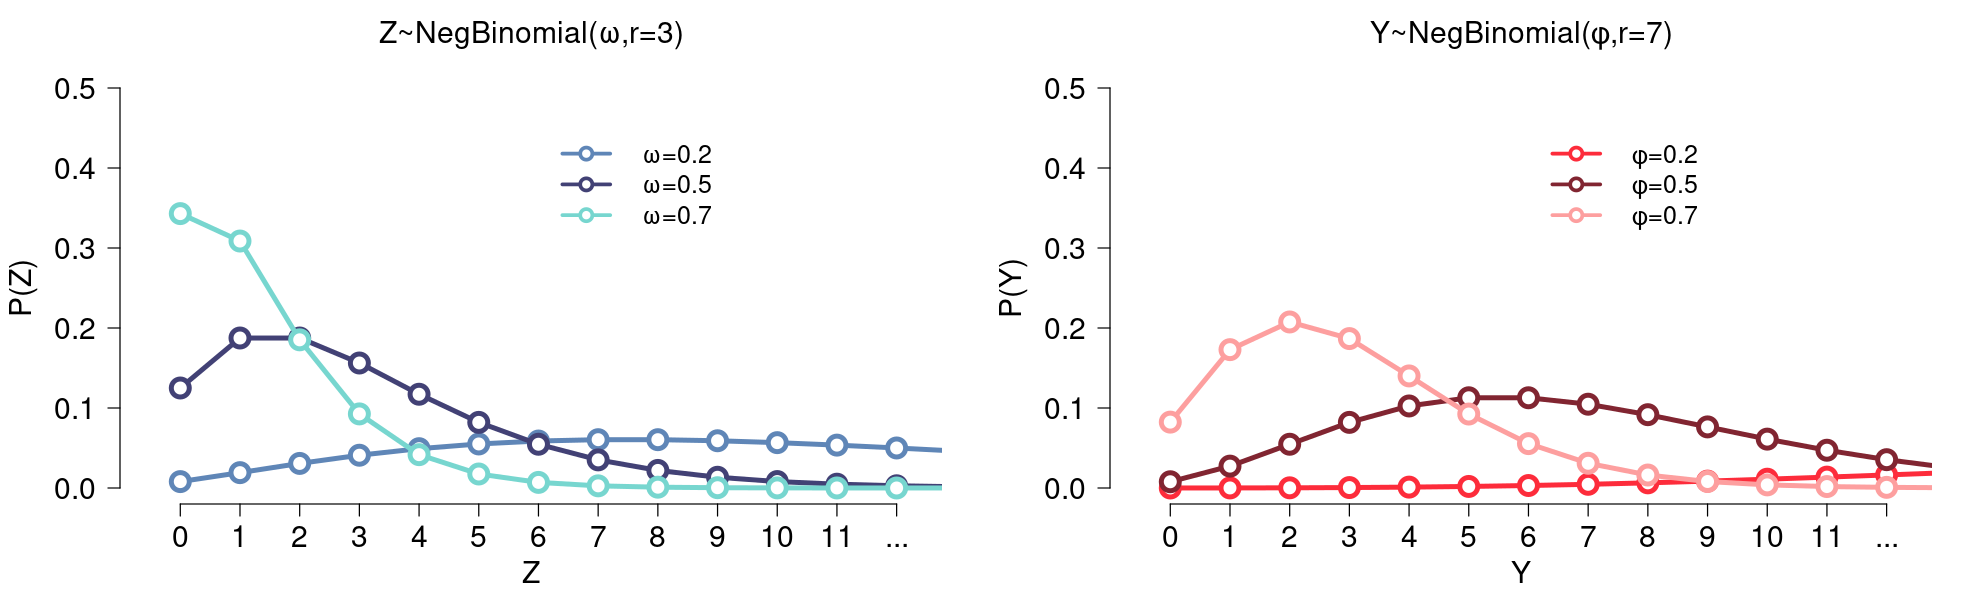

In [5]:
# Examples Negative Binomial Distribution
# Density Definition
negbinom <- function(prob,r){
    x <- 0:100 # Although this random variable runs up to infinity
    pmf <- factorial(x+r-1)/(factorial(x)*factorial(r-1))*(prob^r)*(1-prob)^(x)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 16.5, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.5)
layout(matrix(1:2,ncol=2))
# n_failures before 3 successes
n <- 3
omega <- c(0.2,0.5,0.7)
colors <- c("#5f86b7", "#424175", "#77d6cf")
plot(NULL,xlim=c(-.5,12+.25),ylim=c(0,.5),ann=F,axes=F)
axis(1,at=0:12,labels=c(as.character(0:11),'...'));axis(2,las=1)
for(om in 1:length(omega)){
    distribution <- negbinom(omega[om],n)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[om])
}
legend(6,.45,xjust=0,yjust=1,
      legend=paste('\u03c9=',omega,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.6,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Z',1,line=2.5,cex=1.5)
mtext('P(Z)',2,line=3.5,cex=1.5)
mtext('Z~NegBinomial(\u03c9,r=3)',3,line=1,cex=1.5)
# n_failures before 7 successes
m <- 7
kappa <- c(0.2,0.5,0.7)
colors <- c("#fd2c3b", "#812531","#fd9f9f")
plot(NULL,xlim=c(-.5,12+.25),ylim=c(0,.5),ann=F,axes=F)
axis(1,at=0:12,labels=c(as.character(0:11),'...'));axis(2,las=1)
for(kp in 1:length(kappa)){
    distribution <- negbinom(kappa[kp],m)
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[kp])
}
legend(6,.45,xjust=0,yjust=1,
      legend=paste('\u03c6=',kappa,sep=''),
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=.6,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('Y',1,line=2.5,cex=1.5)
mtext('P(Y)',2,line=3.5,cex=1.5)
mtext('Y~NegBinomial(\u03c6,r=7)',3,line=1,cex=1.5)

#### Relaciones "anidadas"

Las distribuciones que hemos presentado hasta el momento trabajan sobre una serie de ensayos Bernoulli iid, aunque cada una responde preguntas diferentes sobre dicha serie. Sin embargo, en tanto que modelan el mismo "experimento" es posible identificar ciertas relaciones entre dichas distribuciones. Por ejemplo, una variable Binomial _puede_ ser una variable _Bernoulli_, pero para que este sea el caso el parámetro $n$ tiene que ser igual a $1$:

$$\begin{align}E\sim &Binomial(\phi,n=1)\\\\
                &E\in\{0,1\}\\
                &P(E=e)={\mathbf{1}\choose e}\phi^e(1-\phi)^{\mathbf{1}-e}\\
                &P(E)=\begin{cases}
                    P(E=0)&={\mathbf{1}\choose 0}\phi^0(1-\phi)^{\mathbf{1}-0}\\\\
                          &=\frac{1!}{0!(1-0)!}(1)(1-\phi)^1\\\\
                          &=(1-\phi)\\\\
                    P(E=1)&={\mathbf{1}\choose 1}\phi^1(1-\phi)^{\mathbf{1}-1}\\\\
                          &=\frac{1!}{1!(1-1)!}\phi(1-\phi)^0\\\\
                          &=\phi
                \end{cases}\\\\
E\sim Binomial(\phi,n=1)&\Rightarrow E\sim Bernoulli(\phi)      \\      
\end{align}$$

En palabras, esta relación puede expresarse diciendo que la distribución Bernoulli es un **_caso especial_** de la distribución Binomial, o bien que el modelo Bernoulli está **anidado ("nested")** dentro del modelo Binomial, en el valor específico $n=1$.

Otro ejemplo de relaciones anidadas ocurre entre la Binomial Negativa y la Geométrica:

$$\begin{align}H\sim &NegBinomial(\psi,r=1)\\\\
                &H\in\{0,1,2,\dots,\infty\}\\\\            
                &P(H=h)={h+\mathbf{1}-1\choose h}\psi^\mathbf{1}(1-\psi)^{h}\\\\
                &P(H=h)=\frac{h!}{h!(h-h)!}\psi(1-\psi)^{h}\\\\
                &P(H=h)=\psi(1-\psi)^{h}\\\\
H\sim NegBinomial(\psi,r=1)&\Rightarrow H\sim Geometric(\psi)\\            
\end{align}$$

Es decir, el modelo Geométrico es un caso especial del modelo Binomial Negativo, anidado en $r=1$.

### Distribuciones sin relación con procesos Bernoulli

Las distribuciones presentadas hasta este momento están definidas con base en un proceso Bernoulli, es decir, con base en una sequencia de variables binarias **independientes e idénticamente** distribuidas. En muchos escenarios reales, sin embargo, no siempre es posible argumentar independencia ni/o distribución idéntica, y por lo tanto no es apropiado utilizar las distribuciones anteriores para modelar este tipo de fenómenos. Existen otras distribuciones apropiadas para ello que, aunque trabajan con supuestos distintos, también permiten cuantificar incertidumbre de manera precisa.

#### Quesadillas el jueves

Para ejemplificar una de ellas imaginen que el puesto de la esquina ha preparado $7$ quesadillas, $m=4$ de queso y $n=3$ de otro ingrediente. Desafortunadamente al momento de prepararlas han olvidado marcarlas y después de revolverlas en el aceite no es posible saber cuáles son de queso y cuáles de algo diferente. Llegamos decididos a comprar $k=5$ quesadillas y, como preferimos las de queso, nos interesa saber cuántas de esas incluirá nuestra orden.

En otras palabras, haremos una extracción **sin reemplazo** de tamaño $k=5$ del total de $7$ quesadillas. Como **no** devolveremos cada quesadilla después de sacarla, la probabilidad de sacar una de queso se altera después de cada extracción (¡sin importar de qué fue la que sacamos!), lo cual implica que **no** podemos suponer distribución idéntica entre quesadillas; además, como la probabilidad de sacar una de queso cambia de manera diferente dependiendo de qué fue la quesadilla que acabamos de sacar, **tampoco** podemos suponer independencia entre quesadillas. En otras palabras, para modelar el número total de quesadillas de queso en nuestra orden **no** debemos utilizar ninguna de las distribuciones que hemos estudiado hasta ahora.

Como de costumbre, el primer paso para modelar nuestra incertidumbre consiste en identificar las posibilidades de la variable aleatoria de interés. En este ejemplo, la variable que representa el número de quesadillas de queso en la orden de $k=5$ puede tomar los valores:

$$X\in\{2,3,4\}$$

porque en el peor escenario nos van a tocar las $n=3$ quesadillas de otra cosa, y en el mejor escenario nos llevaremos todas las $m=4$ de queso.

Para calcular el valor de probabilidad correspondiente a cada entrada de $X$ empezaremos imaginando la situación en la freidora, asignando un "nombre" a cada quesadilla. Para facilitar la notación en las secciones siguientes señalaremos a las quesadillas de queso con un color <font color='#fd2c3b'>llamativo</font> y a las de otro ingrediente con <font color='#555555'>gris</font>.

$$\mathrm{freidora}=\begin{cases}
\left.
\begin{aligned}
&\color{#fd2c3b}a\\
&\color{#fd2c3b}b\\
&\color{#fd2c3b}c\\
&\color{#fd2c3b}d\\
\end{aligned}
\qquad\right\}
\text{Quesadillas de queso}\\
\left.
\begin{aligned}
&\color{#555555}e\\
&\color{#555555}f\\
&\color{#555555}g\\
\end{aligned}
\qquad\right\}
\text{Quesadillas de otra cosa}\\
\end{cases}$$

A continuación enlistaremos todos los posibles "paquetes" de $k=5$ quesadillas que se pueden extraer de la freidora, que tiene un total de $m+n=7$ quesadillas. Podemos utilizar el **coeficiente binomial** para anticipar cuántos serán:

$$\begin{aligned}{m+n\choose k}={7\choose 5}&=\frac{7!}{5!(7-5)!}\\\\
                                            &=\frac{(7)(6)(5!)}{(5!)(2!)}\\\\
                                            &=\frac{42}{2}\\\\
                                            &=21
\end{aligned}$$

Siendo los $21$ posibles paquetes:

$$\textrm{posibles paquetes}=\begin{cases}
\left.
\begin{aligned}
&[\color{#fd2c3b}{abcd}\color{#555555}e],[\color{#fd2c3b}{abcd}\color{#555555}f],[\color{#fd2c3b}{abcd}\color{#555555}g]\\
\end{aligned}
\right\}
X=\mathbf{4}\\\\
\left.
\begin{aligned}
&[\color{#fd2c3b}{abc}\color{#555555}{ef}],[\color{#fd2c3b}{abc}\color{#555555}{eg}],[\color{#fd2c3b}{abc}\color{#555555}{fg}]\\
&[\color{#fd2c3b}{abd}\color{#555555}{ef}],[\color{#fd2c3b}{abd}\color{#555555}{eg}],[\color{#fd2c3b}{abd}\color{#555555}{fg}]\\
&[\color{#fd2c3b}{acd}\color{#555555}{ef}],[\color{#fd2c3b}{acd}\color{#555555}{eg}],[\color{#fd2c3b}{acd}\color{#555555}{fg}]\\
&[\color{#fd2c3b}{bcd}\color{#555555}{ef}],[\color{#fd2c3b}{bcd}\color{#555555}{eg}],[\color{#fd2c3b}{bcd}\color{#555555}{fg}]\\
\end{aligned}
\right\}
X=\mathbf{3}\\\\
\left.
\begin{aligned}
&[\color{#fd2c3b}{ab}\color{#555555}{efg}]\\
&[\color{#fd2c3b}{ac}\color{#555555}{efg}]\\
&[\color{#fd2c3b}{ad}\color{#555555}{efg}]\\
&[\color{#fd2c3b}{bc}\color{#555555}{efg}]\\
&[\color{#fd2c3b}{bd}\color{#555555}{efg}]\\
&[\color{#fd2c3b}{cd}\color{#555555}{efg}]\\
\end{aligned}
\right\}
X=\mathbf{2}
\end{cases}$$

Es decir, $3$ paquetes de $21$ posibles tienen $X=4$ quesadillas, por lo tanto $P(X=4)=\frac{3}{21}$. De manera similar, suponiendo que todos los paquetes son igualmente probables: $P(X=3)=\frac{12}{21}$ y $P(X=2)=\frac{6}{21}$.

Aunque ya tenemos la distribución sobre $X$ vale la pena encontrar una expresión más general y abstracta para relacionar los posibles **valores numéricos de la variable** con sus valores de **probabilidad** correspondientes. En el listado anterior hemos organizado los posibles paquetes en "rectángulos", agrupados de acuerdo con el valor correspondiente de $X$. Esta agrupación vuelve más claro que el número de posibles paquetes que corresponden a cada valor de $X$, es igual al producto entre (el número de maneras en que podemos tomar $X=x$ de un total de $m=4$ éxitos) por (el número de veces en que podemos tomar $k-x$ fracasos de un total de $n=3$). Por ejemplo, en el caso específico de $X=3$, los $12$ posibles paquetes que corresponden con dicho valor de la variable pueden expresarse como:

$$\begin{align}
\textrm{#}(X=3)&=(\textrm{# de maneras de ver $\mathbf{3}$ éxitos de un total de $m=4$})(\textrm{# de maneras de ver $k-\mathbf{3}$ fracasos de un total de $n=3$})\\
&={m\choose \mathbf{3}}{n\choose k-\mathbf{3}}\\\\
&={4\choose \mathbf{3}}{3\choose 5-\mathbf{3}}\\\\
&=\Big(\frac{4!}{3!(4-3)!}\Big)\Big(\frac{3!}{2!(3-2)!}\Big)\\\\
&=\Big(\frac{4(3!)}{3!(1)!}\Big)\Big(\frac{3(2!)}{2!(1)!}\Big)\\\\
&=(4)(3)\\\\
&=12
\end{align}$$

Utilizando la misma expresión para contar los paquetes que tienen $X=4$:

$$\begin{align}
\textrm{#}(X=4)&=(\textrm{# de maneras de ver $\mathbf{4}$ éxitos de un total de $m=4$})(\textrm{# de maneras de ver $k-\mathbf{4}$ fracasos de un total de $n=3$})\\
&={m\choose \mathbf{4}}{n\choose k-\mathbf{4}}\\\\
&={4\choose \mathbf{4}}{3\choose 5-\mathbf{4}}\\\\
&=\Big(\frac{4!}{4!(4-4)!}\Big)\Big(\frac{3!}{1!(3-1)!}\Big)\\\\
&=(1)\Big(\frac{3(2!)}{2!}\Big)\\\\
&=(1)(3)\\\\
&=3
\end{align}$$

Y para contar los paquetes que tienen $X=2$:

$$\begin{align}
\textrm{#}(X=2)&=(\textrm{# de maneras de ver $\mathbf{2}$ éxitos de un total de $m=4$})(\textrm{# de maneras de ver $k-\mathbf{2}$ fracasos de un total de $n=3$})\\
&={m\choose \mathbf{2}}{n\choose k-\mathbf{2}}\\\\
&={4\choose \mathbf{2}}{3\choose 5-\mathbf{2}}\\\\
&=\Big(\frac{4!}{2!(4-2)!}\Big)\Big(\frac{3!}{3!(3-3)!}\Big)\\\\
&=\Big(\frac{(4)(3)(2!)}{2!(2!)}\Big)(1)\\\\
&=(6)(1)\\\\
&=6
\end{align}$$

Es decir, podemos expresar el número de paquetes que corresponden a cualquier valor $X=x$ de la variable con la expresión:

$$\begin{align}
\textrm{#}(X=x)={m\choose x}{n\choose k-x}\\\\
\end{align}$$

Y para calcular el valor de probabilidad correspondiente basta dividir ese número de paquetes entre el total de paquetes posibles de tamaño $k$, suponiendo que todos los paquetes posibles son igualmente probables:

$$\begin{align}
P(X=x)=\frac{{m\choose x}{n\choose k-x}}{m+n\choose k}\\\\
\end{align}$$

#### Quesadillas el viernes

Para evaluar la generalidad de la expresión anterior consideren lo que ocurre un día después, en el que de nuevo se olvidan de marcar las quesadillas pero, a diferencia del día anterior, saben que han hecho $m=3$ éxitos y $n=5$ fracasos; además, no pedimos cinco sino $k=6$ quesadillas. ¿Cuántas quesadillas de queso tendrá nuestra orden?

En este nuevo ejemplo la variable de interés puede tomar:

$$X\in\{1,2,3\},$$

porque lo peor que puede pasar es quedarnos con todos los fracasos, y lo mejor es llevarnos todos los éxitos disponibles.

La nueva freidora se ve:

$$\mathrm{freidora}=\begin{cases}
\left.
\begin{aligned}
&\color{#fd2c3b}a\\
&\color{#fd2c3b}b\\
&\color{#fd2c3b}c\\
\end{aligned}
\qquad\right\}
\text{Quesadillas de queso}\\
\left.
\begin{aligned}
&\color{#555555}d\\
&\color{#555555}e\\
&\color{#555555}f\\
&\color{#555555}g\\
&\color{#555555}h\\
\end{aligned}
\qquad\right\}
\text{Quesadillas de otra cosa}\\
\end{cases}$$

Anticipando el número de posibles paquetes de $k=6$, tomados de un total de $m+n=8$:

$$\begin{aligned}{m+n\choose k}={8\choose 6}&=\frac{8!}{6!(8-6)!}\\\\
                                            &=\frac{(8)(7)(6!)}{(6!)(2!)}\\\\
                                            &=\frac{56}{2}\\\\
                                            &=28
\end{aligned}$$

Siendo los $28$ paquetes posibles:

$$\textrm{posibles paquetes}=\begin{cases}
\left.
\begin{aligned}
&[\color{#fd2c3b}{abc}\color{#555555}{def}],[\color{#fd2c3b}{abc}\color{#555555}{deg}],[\color{#fd2c3b}{abc}\color{#555555}{deh}],[\color{#fd2c3b}{abc}\color{#555555}{dfg}],[\color{#fd2c3b}{abc}\color{#555555}{dfh}],
[\color{#fd2c3b}{abc}\color{#555555}{dgh}],[\color{#fd2c3b}{abc}\color{#555555}{efg}],[\color{#fd2c3b}{abc}\color{#555555}{efh}],[\color{#fd2c3b}{abc}\color{#555555}{egh}],[\color{#fd2c3b}{abc}\color{#555555}{fgh}]\\
\end{aligned}
\right\}
X=\mathbf{3}\\\\
\left.
\begin{aligned}
&[\color{#fd2c3b}{ab}\color{#555555}{defg}],[\color{#fd2c3b}{ab}\color{#555555}{defh}],[\color{#fd2c3b}{ab}\color{#555555}{degh}],[\color{#fd2c3b}{ab}\color{#555555}{dfgh}],[\color{#fd2c3b}{ab}\color{#555555}{efgh}]\\
&[\color{#fd2c3b}{ac}\color{#555555}{defg}],[\color{#fd2c3b}{ac}\color{#555555}{defh}],[\color{#fd2c3b}{ac}\color{#555555}{degh}],[\color{#fd2c3b}{ac}\color{#555555}{dfgh}],[\color{#fd2c3b}{ac}\color{#555555}{efgh}]\\
&[\color{#fd2c3b}{bc}\color{#555555}{defg}],[\color{#fd2c3b}{bc}\color{#555555}{defh}],[\color{#fd2c3b}{bc}\color{#555555}{degh}],[\color{#fd2c3b}{bc}\color{#555555}{dfgh}],[\color{#fd2c3b}{bc}\color{#555555}{efgh}]\\
\end{aligned}
\right\}
X=\mathbf{2}\\\\
\left.
\begin{aligned}
&[\color{#fd2c3b}{a}\color{#555555}{defgh}]\\
&[\color{#fd2c3b}{b}\color{#555555}{defgh}]\\
&[\color{#fd2c3b}{c}\color{#555555}{defgh}]\\
\end{aligned}
\right\}
X=\mathbf{1}
\end{cases}$$

Contando el número de paquetes que corresponden a cada valor $X=x$:

$$\begin{align}
\textrm{#}(X=3)&=(\textrm{# de maneras de ver $\mathbf{3}$ éxitos de un total de $m=3$})(\textrm{# de maneras de ver $k-\mathbf{3}$ fracasos de un total de $n=5$})\\
&={m\choose \mathbf{3}}{n\choose k-\mathbf{3}}\\\\
&={3\choose \mathbf{3}}{5\choose 6-\mathbf{3}}\\\\
&=\Big(\frac{3!}{3!(3-3)!}\Big)\Big(\frac{5!}{3!(5-3)!}\Big)\\\\
&=(1)\Big(\frac{(5)(4)(3!)}{3!(2!)}\Big)\\\\
&=(1)(10)\\\\
&=10\\\\\\
\textrm{#}(X=2)&=(\textrm{# de maneras de ver $\mathbf{2}$ éxitos de un total de $m=3$})(\textrm{# de maneras de ver $k-\mathbf{2}$ fracasos de un total de $n=5$})\\
&={m\choose \mathbf{2}}{n\choose k-\mathbf{2}}\\\\
&={3\choose \mathbf{2}}{5\choose 6-\mathbf{2}}\\\\
&=\Big(\frac{3!}{2!(3-2)!}\Big)\Big(\frac{5!}{4!(5-4)!}\Big)\\\\
&=(3)\Big(\frac{(5)(4!)}{4!(1!)}\Big)\\\\
&=(3)(5)\\\\
&=15\\\\\\
\textrm{#}(X=1)&=(\textrm{# de maneras de ver $\mathbf{1}$ éxitos de un total de $m=3$})(\textrm{# de maneras de ver $k-\mathbf{1}$ fracasos de un total de $n=5$})\\
&={m\choose \mathbf{1}}{n\choose k-\mathbf{1}}\\\\
&={3\choose \mathbf{1}}{5\choose 6-\mathbf{1}}\\\\
&=\Big(\frac{3!}{1!(3-1)!}\Big)\Big(\frac{5!}{5!(5-5)!}\Big)\\\\
&=\Big(\frac{(3)(2!)}{(1)(2!)}\Big)(1)\\\\
&=(3)(1)\\\\
&=3\\\\\\
\end{align}$$

Es decir, también podemos utilizar la misma función de masa para calcular la distribución sobre $X$ en este nuevo escenario:

$$\begin{align}
P(X=x)=\frac{{m\choose x}{n\choose k-x}}{m+n\choose k}\\\\
\end{align}$$

Resumiendo,

### Distribución Hipergeométrica

_Modela el número de éxitos en una extracción sin reemplazo de tamaño $k$ tomada de una población compuesta por $m$ éxitos y $n$ fracasos._

$$\begin{align}
\mathrm{\textbf{Variable Aleatoria}}\\
X\in\{max(0,k-n),...,min(k,m)\}\\
&\textrm{Variable discreta que representa}\\ 
&\textrm{el número de éxitos en la muestra}\\ 
&\textrm{sin reemplazo de tamaño $k$.}\\\\
\mathrm{\textbf{Parámetros}}\\
m\in\{0,1,2,\dots,\infty\}\\
&\textrm{Número de éxitos en la población.}\\\\
n\in\{0,1,2,\dots,\infty\}\\
&\textrm{Número de fracasos en la población.}\\\\
k\in\{0,1,2,\dots,m+n\}\\
&\textrm{Tamaño de la muestra sin reemplazo.}\\\\
\mathrm{\textbf{Función de Masa}}\\ 
\mathrm{\textbf{de Probabilidad (PMF)}}\\
&P(X=x)=\frac{{m\choose x}{n\choose k-x}}{m+n\choose k}\\\\
\mathrm{\textbf{Notación Compacta}}\\
&X\sim Hypergeometric(m,n,k)
\end{align}$$

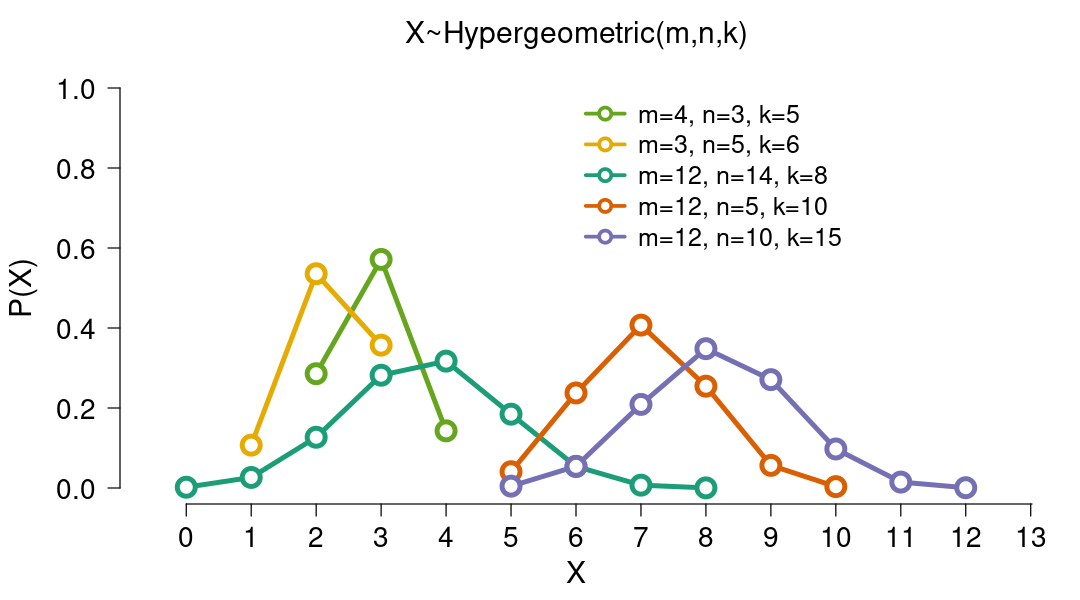

In [6]:
# Examples Hypergeometric Distribution
# Density Definition
hypergeometric <- function(m,n,k){
    x <- max(0,k-n):min(k,m)
    bin_coef <- function(a,b){
        res <- factorial(a)/(factorial(b)*factorial(a-b))
    }
    pmf <- bin_coef(m,x)*bin_coef(n,k-x)/bin_coef(m+n,k)
    return(list(x=x,pmf=pmf))
}
# Plotting
options(repr.plot.width = 9, repr.plot.height = 5)
par(mar=c(4,5,3,2),cex.axis=1.4)
m <- c(4,3,12,12,12)
n <- c(3,5,14,5,10)
k <- c(5,6,8,10,15)
colors <- c("#66a61e", "#e6ab02", "#1b9e77", "#d95f02", "#7570b3", "#66a61e", "#e6ab02")
plot(NULL,xlim=c(-.5,12.5),ylim=c(0,1),ann=F,axes=F)
axis(1,at=0:15);axis(2,las=1)
label <- NULL
for(pr in 1:length(m)){
    distribution <- hypergeometric(m[pr],n[pr],k[pr])
    points(distribution$x,distribution$pmf,
          pch=21,bg='#ffffff',type='o',lwd=4,cex=2,col=colors[pr])
    label <- append(label,paste('m=',m[pr],', n=',n[pr],', k=',k[pr],sep=''))
}
legend(6,1,xjust=0,yjust=1,
      legend=label,
      lwd=3,col=colors,pch=21,pt.bg='#ffffff',
      seg.len=1.2,pt.cex=1.35,y.intersp=1.5,x.intersp=.4,
      cex=1.25,box.lty='blank')
mtext('X',1,line=2.5,cex=1.5)
mtext('P(X)',2,line=3.5,cex=1.5)
mtext('X~Hypergeometric(m,n,k)',3,line=1,cex=1.5)

### Inferencia sobre no-observables discretos

Los modelos anteriores permiten calcular la incertidumbre sobre la variable aleatoria una vez que conocemos o que "fijamos" los valores de los parámetros. En escenarios reales, sin embargo, es común encontrar el **problema inverso**: generalmente tendremos acceso al valor de la variable aleatoria pero no tendremos acceso al valor paramétrico bajo el cual dicha observación fue "generada". El problema de inferencia consiste en especificar la incertidumbre sobre los **posibles valores paramétricos** a la luz de la observación disponible.

Por ejemplo, imaginen que un pariente muy joven consigue una bolsa de "panditas", que son dulces de colores presentados en una bolsita. Como la bolsita es transparente es posible observar cuántos panditas de cada color incluye el paquete. Supongan que _sabemos_ que la bolsita tiene $m=6$ panditas <font color='#ee0000'>rojos</font> y $n=18$ panditas de otro color. Suponiendo que nos gustan los dulces de ese <font color='#ee0000'>color</font>, y pensando en convencer al pariente de que nos invite, podemos decirle algo como "toma un puñito de panditas y nada más me das los <font color='#ee0000'>rojos</font>".

Como la petición es razonable nuestro pariente accede y nos entrega $x=2$ panditas rojos. _¿Cuántos panditas (sin reemplazo) sacó de la bolsa?_

Este problema es inverso respecto de la pregunta que responde la distribución Hipergeométrica: en vez de preguntar _¿cuántos éxitos esperamos en extracciones de tamaño $k$?_, esta vez queremos saber _¿de qué tamaño $k$ fue la extracción hipergeométrica de tal manera que observamos $x=2$?_ Para resolver esta pregunta utilizaremos la Regla de Bayes.

El primer paso es especificar la incertidumbre inicial sobre la variable no-observable $k$, la cantidad de panditas que el pariente sacó de la bolsa. Esta incertidumbre representa nuestro estado de conocimiento _antes_ de observar la cantidad de éxitos en esa muestra; en ese punto, digamos que suponíamos que el pariente al menos sacaría un dulce, y máximo sacaría 10, es decir:

$$k\in\{1,2,\dots,10\}$$

Además utilizaremos la siguiente incertidumbre inicial sobre $k$, que en pocas palabras dice que es muy probable que el pariente tome pocos panditas, y poco probable que tome muchos:

$$P(k)=\frac{2520}{7381k}$$

Por el momento no muy relevante de dónde salieron los enteros de la función; lo importante es que nuevamente se trata de una función de una variable (no-observable en este caso) que relaciona sus valores numéricos con los de probabilidad correspondientes. Por ejemplo, evaluando para cada valor de $k$:

$$P(k)=\begin{cases}
P(k=1)=\frac{2520}{7381(1)}\approx0.341\\
P(k=2)=\frac{2520}{7381(2)}\approx0.170\\
P(k=3)=\frac{2520}{7381(3)}\approx0.114\\
P(k=4)=\frac{2520}{7381(4)}\approx0.085\\
P(k=5)=\frac{2520}{7381(5)}\approx0.068\\
P(k=6)=\frac{2520}{7381(6)}\approx0.057\\
P(k=7)=\frac{2520}{7381(7)}\approx0.049\\
P(k=8)=\frac{2520}{7381(8)}\approx0.043\\
P(k=9)=\frac{2520}{7381(9)}\approx0.038\\
P(k=10)=\frac{2520}{7381(10)}\approx0.034,
\end{cases}$$

distribución que cumple:

$$\sum_kP(k)\approx1$$

Gráficamente esta incertidumbre inicial sobre la no-observable $k$ se ve:

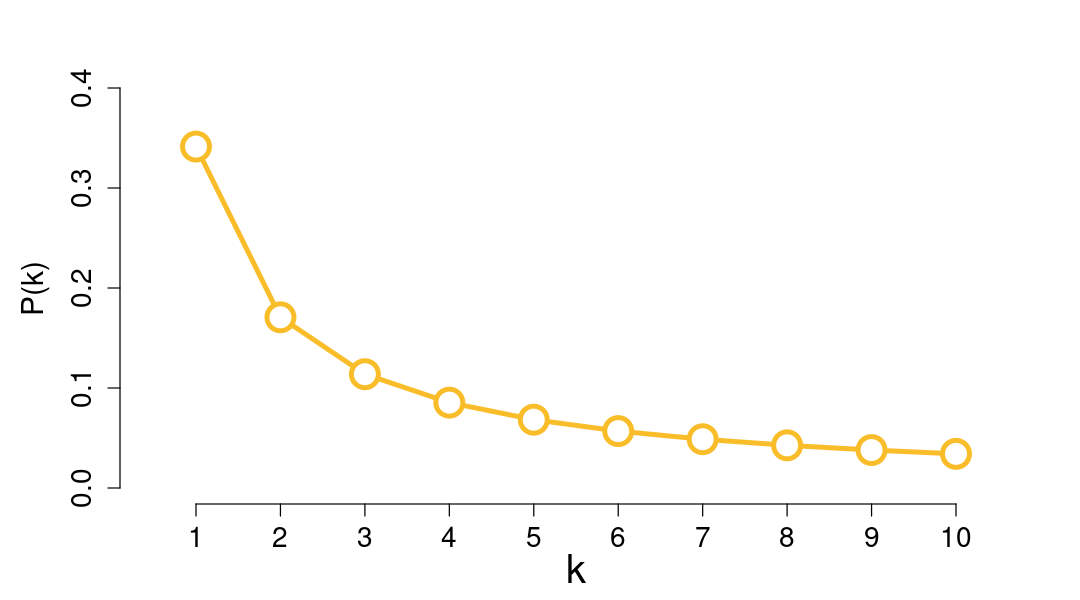

In [7]:
k <- 1:10
P_k <- 2520/(7381*k)
col_prior <- '#fabd2a'
par(mar=c(4,5,3,2),cex.axis=1.4)
plot(NULL,xlim=c(0.5,10.5),ylim=c(0,.40),ann=F,axes=F)
axis(1,at=k);axis(2)
mtext('k',1,line=2.5,cex=2)
mtext('P(k)',2,line=3,cex=1.5)
points(k,P_k,type='o',pch=21,lwd=4,cex=3,bg='#ffffff',col=col_prior)

El paso siguiente consiste en especificar la probabilidad de la evidencia $x=2$ bajo cada posible valor de la no-observable $k$, es decir, buscamos la función de verosimilitud $P(x=2|k)$. Para calcularla aprovecharemos que sabemos cuál es la relación entre la variable observada $x$ y la no-observable $k$:

$$x\sim Hypergeometric(m=6,n=18,k)$$

En otras palabras, calcularemos _¿qué tan probable es observar $x=2$ éxitos en un experimento hipergeométrico con $m=6$, $n=18$, y $k=1$?... ¿y con $k=2$?... ¿y con $k=3$?_ Etcétera. Resolviendo para cada valor posible de $k$:

$$P(x=2|k)=\begin{cases}
P(x=2|k=1)=\frac{{6\choose 2}{18\choose \mathbf{1}-2}}{{24\choose\mathbf{1}}}=\frac{(15)(\textrm{NaN})}{24}=\textrm{NaN}\\\\
P(x=2|k=2)=\frac{{6\choose 2}{18\choose \mathbf{2}-2}}{{24\choose\mathbf{2}}}=\frac{(15)(1)}{276}\approx0.054\\\\
P(x=2|k=3)=\frac{{6\choose 2}{18\choose \mathbf{3}-2}}{{24\choose\mathbf{3}}}=\frac{(15)(18)}{2024}\approx0.133\\\\
P(x=2|k=4)=\frac{{6\choose 2}{18\choose \mathbf{4}-2}}{{24\choose\mathbf{4}}}=\frac{(15)(153)}{10626}\approx0.216\\\\
P(x=2|k=5)=\frac{{6\choose 2}{18\choose \mathbf{5}-2}}{{24\choose\mathbf{5}}}=\frac{(15)(816)}{42504}\approx0.288\\\\
P(x=2|k=6)=\frac{{6\choose 2}{18\choose \mathbf{6}-2}}{{24\choose\mathbf{6}}}=\frac{(15)(3060)}{134596}\approx0.341\\\\
P(x=2|k=7)=\frac{{6\choose 2}{18\choose \mathbf{7}-2}}{{24\choose\mathbf{7}}}=\frac{(15)(8568)}{346104}\approx0.371\\\\
P(x=2|k=8)=\frac{{6\choose 2}{18\choose \mathbf{8}-2}}{{24\choose\mathbf{8}}}=\frac{(15)(18564)}{735471}\approx0.379\\\\
P(x=2|k=9)=\frac{{6\choose 2}{18\choose \mathbf{9}-2}}{{24\choose\mathbf{9}}}=\frac{(15)(31824)}{1307504}\approx0.365\\\\
P(x=2|k=10)=\frac{{6\choose 2}{18\choose \mathbf{10}-2}}{{24\choose\mathbf{10}}}=\frac{(15)(43758)}{1961256}\approx0.335
\end{cases}$$

Noten que esta **función** no agrega a $1$ porque no estamos explorando todas las posibilidades de $x$, sino examinando la probabilidad de **un** valor posible de $x$ bajo todos los posibles de $k$. Gráficamente esta función de verosimilitud luce:

Warning message in gamma(x + 1):
“NaNs produced”


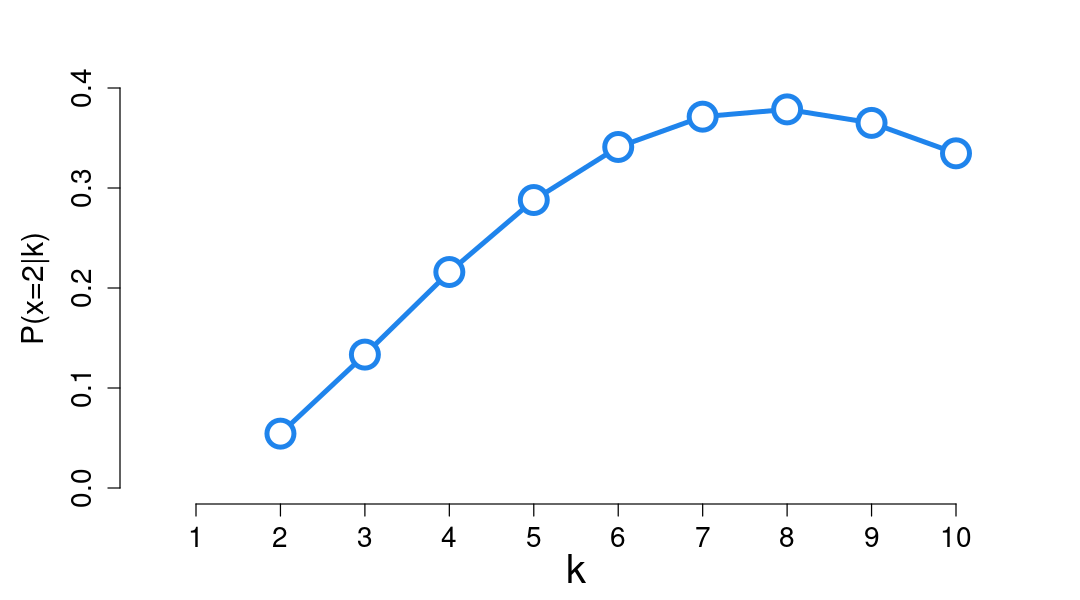

In [21]:
hypergeometric_likelihood <- function(x,m,n,k){
    # Returns hipergeom likelihood as a function of K
    bin_coef <- function(a,b){
        res <- factorial(a)/(factorial(b)*factorial(a-b))
    }
    likelihood <- bin_coef(m,x)*bin_coef(n,k-x)/bin_coef(m+n,k)
    return(list(k=k,likelihood=likelihood))
}

k <- 1:10
lklhd <- hypergeometric_likelihood(x=2,m=6,n=18,k)

col_like <- '#1f84ec'
par(mar=c(4,5,3,2),cex.axis=1.4)
plot(NULL,xlim=c(0.5,10.5),ylim=c(0,.40),ann=F,axes=F)
axis(1,at=k);axis(2)
mtext('k',1,line=2.5,cex=2)
mtext('P(x=2|k)',2,line=3,cex=1.5)
points(lklhd$k,lklhd$likelihood,type='o',pch=21,lwd=4,cex=3,bg='#ffffff',col=col_like)

En palabras, por un lado nuestras creencias iniciales favorecen hipótesis de avaricia en el pariente, pero por otro la evidencia que nos entrega favorece hipótesis de altruismo. Las conclusiones finales son una mezcla "balanceada" entre ambas piezas de información, calculada mediante la Regla de Bayes:

$$P(k|x=2)=\frac{P(x=2|k)P(k)}{\sum_kP(x=2|k)P(k)}$$

Calculando el producto $P(x=2|k)P(k)$:

$$P(x=2|k)P(k)=\begin{cases}
P(x=2|k=1)P(k=1)\approx(\textrm{NaN})(0.341)=\textrm{NaN}\\
P(x=2|k=2)P(k=2)\approx(0.054)(0.170)\approx0.009\\
P(x=2|k=3)P(k=3)\approx(0.133)(0.114)\approx0.015\\
P(x=2|k=4)P(k=4)\approx(0.216)(0.085)\approx0.018\\
P(x=2|k=5)P(k=5)\approx(0.288)(0.068)\approx0.019\\
P(x=2|k=6)P(k=6)\approx(0.341)(0.057)\approx0.019\\
P(x=2|k=7)P(k=7)\approx(0.371)(0.049)\approx0.018\\
P(x=2|k=8)P(k=8)\approx(0.379)(0.043)\approx0.016\\
P(x=2|k=9)P(k=9)\approx(0.365)(0.038)\approx0.014\\
P(x=2|k=10)P(k=10)\approx(0.335)(0.034)\approx0.011,
\end{cases}$$

que son los valores de probabilidad conjunta $P(x=2,k)$. Calculando la probabilidad total de la evidencia $P(x=2)$:

$$\begin{align}
\sum_kP(x=2|k)P(k)&\approx0.009+0.015+\dots+0.011\\
                  &\approx0.1415
\end{align}$$

Finalmente, la incertidumbre posterior sobre $k$ dada la observación $x=2$:

$$P(k|x=2)\begin{cases}
P(k=1|x=2)\approx\frac{\textrm(NaN)}{0.1415}\approx\textrm{NaN}\\
P(k=2|x=2)\approx\frac{0.009}{0.1415}\approx0.066\\
P(k=3|x=2)\approx\frac{0.015}{0.1415}\approx0.107\\
P(k=4|x=2)\approx\frac{0.018}{0.1415}\approx0.130\\
P(k=5|x=2)\approx\frac{0.019}{0.1415}\approx0.139\\
P(k=6|x=2)\approx\frac{0.019}{0.1415}\approx0.137\\
P(k=7|x=2)\approx\frac{0.018}{0.1415}\approx0.128\\
P(k=8|x=2)\approx\frac{0.016}{0.1415}\approx0.114\\
P(k=9|x=2)\approx\frac{0.014}{0.1415}\approx0.098\\
P(k=10|x=2)\approx\frac{0.011}{0.1415}\approx0.081\\
\end{cases}$$

Que especifica qué valores de $k$ son más probables partiendo de cierta incertidumbre inicial $P(k)$ y utilizando cierta relación de verosimilitud entre la evidencia $x$ y la no-observable $k$. Al tratarse de una distribución sobre todas las posibilidades sobre $k$, nuevamente cumple:

$$\sum_kP(k|x=2)\approx1$$

Warning message in gamma(x + 1):
“NaNs produced”


[1] "P_k"
 [1] 0.34141715 0.17070858 0.11380572 0.08535429 0.06828343 0.05690286
 [7] 0.04877388 0.04267714 0.03793524 0.03414172

[1] "P_x_D_k"
 [1]        NaN 0.05434783 0.13339921 0.21597967 0.28797290 0.34102054
 [7] 0.37133347 0.37861452 0.36509257 0.33466819

[1] "P_k_D_x"
 [1]        NaN 0.06556246 0.10728402 0.13027345 0.13895835 0.13712995
 [7] 0.12798795 0.11418533 0.09787314 0.08074534


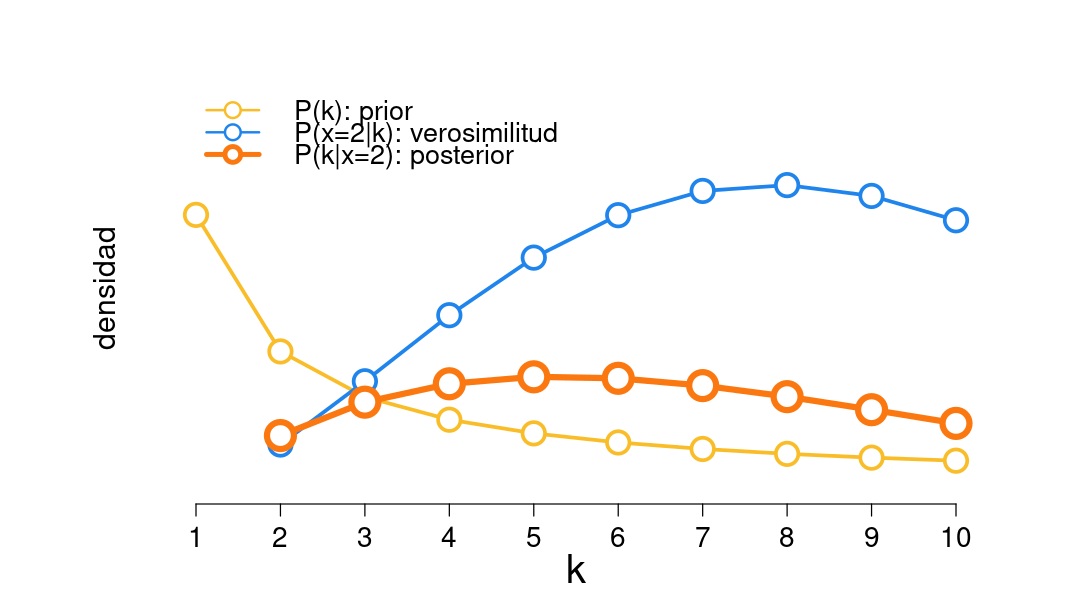

In [27]:
# Non-observable variable:
k <- 1:10

# Prior uncertainty
P_k <- 2520/(7381*k)

# Likelihood function
hypergeometric_likelihood <- function(x,m,n,k){
    # Returns hipergeom likelihood as a function of K
    bin_coef <- function(a,b){
        res <- factorial(a)/(factorial(b)*factorial(a-b))
    }
    likelihood <- bin_coef(m,x)*bin_coef(n,k-x)/bin_coef(m+n,k)
    return(likelihood)
}

# Likelihood of x=2
P_x_D_k <- hypergeometric_likelihood(x=2,m=6,n=18,k)

# Posterior uncertainty
P_k_D_x <- lklhd$likelihood*P_k/sum(lklhd$likelihood*P_k,na.rm=T)

# Plotting
col_prior <- '#fabd2a'
col_like <- '#1f84ec'
col_post <- '#fb7810'
par(mar=c(4,5,3,2),cex.axis=1.4)
plot(NULL,xlim=c(0.5,10.5),ylim=c(0,.50),ann=F,axes=F)
axis(1,at=k)
mtext('k',1,line=2.5,cex=2)
mtext('densidad',2,line=0,cex=1.5)
points(k,P_k,type='o',pch=21,lwd=3,cex=2.5,bg='#ffffff',col=col_prior)
points(k,P_x_D_k,type='o',pch=21,lwd=3,cex=2.5,bg='#ffffff',col=col_like)
points(k,P_k_D_x,type='o',pch=21,lwd=5,cex=3,bg='#ffffff',col=col_post)
legend(1,.5,yjust=1,xjust=0,
      legend=c('P(k): prior','P(x=2|k): verosimilitud','P(k|x=2): posterior'),
      pch=21,lwd=c(2,2,4),seg.len=1.5,pt.cex=1.75,cex=1.35,box.lty='blank',
      col=c(col_prior,col_like,col_post),pt.bg='#ffffff')

print('P_k')
print(P_k)
cat('\n')
print('P_x_D_k')
print(P_x_D_k)
cat('\n')
print('P_k_D_x')
print(P_k_D_x)

#### Modelos Gráficos y notación

El problema anterior tiene una estructura similar a todos los problemas de inferencia desde la perspectiva Bayesiana. En concreto, siempre **a.** tenemos cierta incertidumbre inicial sobre un conjunto de variables no-observables, **b.** una función (o modelo) que relaciona las observaciones con las variables no-observables, y **c.** una regla que especifica cómo actualizar la incertidumbre inicial en incertidumbre posterior utilizando los primeros dos componentes.

Como estos componentes aparecen una y otra vez, y siempre seguimos la misma "receta" para calcular la distribución posterior, la comunidad ha desarrollado cierta notación para expresar los particulares de cierto problema de manera compacta pero sin perder precisión.

En esta notación, el problema que acabamos de resolver se presenta como:

$$\begin{align}
k&\sim \frac{2520}{7381k}; k\in\{1,2,\dots,10\}\\
x|m,n,k&\sim Hypergeometric(m,n,k)\\
m&\leftarrow6\\
n&\leftarrow18\\
x&\leftarrow2
\end{align}$$

Aparte de estas expresiones también es común encontrar una descripción gráfica de las relaciones entre variables y el tipo de incertidumbre de cada una. En el modelo gráfico, que se presenta a continuación, todas las variables aparecen en un cuadro porque todas son discretas; las variables conocidas y/u observables aparecen en gris, mientras que las no-observables se presentan en blanco; finalmente, las relaciones condicionales entre variables se expresan con flechas.

<img src='hyper_model_tex.png' width=300 height=300 />

Al ver este tipo de representación es inmediato encontrar la variable no conocida y saber cuáles sí han sido medidas. Noten que el problema de inferencia equivale a "rastrear" el valor desconocido de $k$ en el sentido contrario a la flecha, es decir, a partir de la información disponible sobre $x$.

### Ejercicio

1. Imagina que cierta organización laboral buscaba cierto número $r$ de candidatos para operar una máquina extraña. _Sabemos_ que sólo $0.20$ de las personas es capaz de cubrir el puesto, y podemos suponer independencia y distribución idéntica entre aplicantes. No sabemos cuántas plazas había, pero sabemos que la organización detuvo las entrevistas habiendo _rechazado_ a $15$ participantes. _¿Cuántas plazas había disponibles?_
    * Especifica la función de verosimilitud y la distribución posterior sobre $r$ partiendo de esta incertidumbre inicial:
    
    $$\begin{align}
    r&\in\{1,2,\dots,20\}\\\\
    P(r)&=\frac{1}{20},\ \ \ \forall r
    \end{align}$$

        y utilizando el modelo adecuado.


### Referencias recomendadas

* _Bayesian Inference is Just Counting_, by Richard McElreath: https://www.youtube.com/watch?v=_NEMHM1wDfI&t=1689s

#### Paletas de colores

* _Colorgorical:_ http://vrl.cs.brown.edu/color

* _Color Brewer:_ https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3